### LSE Data Analytics Online Career Accelerator

# Course 2: Data Analytics using Python

## Assignment: Diagnostic Analysis using Python

You’ll be working with real-world data to address a problem faced by the National Health Service (NHS). The analysis will require you to utilise Python to explore the available data, create visualisations to identify trends, and extract meaningful insights to inform decision-making. 

### A note for students using this template
This Jupyter Notebook is a template you can use to complete the Course 2 assignment: Diagnostic Analysis using Python. 

Keep in mind: 
- You are **not required** to use this template to complete the assignment. 
- If you decide to use this template for your assignment, make a copy of the notebook and save it using the assignment naming convention: **LastName_FirstName_DA201_Assignment_Notebook.ipynb**.
- The workflow suggested in this template follows the Assignment Activities throughout the course.
- Refer to the guidance on the Assignment Activity pages for specific details. 
- The markup and comments in this template identify the key elements you need to complete before submitting the assignment.
- Make this notebook your own by adding your process notes and rationale using markdown, add links, screenshots, or images to support your analysis, refine or clarify the comments, and change the workflow to suit your process.
- All elements should be functional and visible in your Notebook. 
- Be sure to push your notebook to GitHub after completing each Assignment Activity.

 > ***Markdown*** Remember to change cell types to `Markdown`. You can review [Markdown basics](https://docs.github.com/en/get-started/writing-on-github/getting-started-with-writing-and-formatting-on-github/basic-writing-and-formatting-syntax) to find out how to add formatted text, links, and images to your notebook.

# 

# Assignment activity 1

### Insert proof of your GitHub repository. This can be a link or screenshot showing your repo.

In [12]:
# My GitHub repository.
https://github.com/mikebenas/LSE_DA_NHS_analysis.git

SyntaxError: invalid syntax (450319630.py, line 2)

# 

# Assignment activity 2

### Prepare your workstation

In [ ]:
# Import the necessary libraries.
import pandas as pd
import numpy as np
import os

#Specify path for linux & windows:
#os.chdir ('/home/mike/GitFilesLocalRepo/NHS')
os.chdir('Z:\DataAnalytics\LSE\Assignments\Course 2')

# Optional - Ignore warnings.
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import and sense-check the actual_duration.csv data set as ad.
ad=pd.read_csv('actual_duration.csv')

# View the DataFrame.
ad.head ()

,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [ ]:
# Determine whether there are missing values.
ad_na=ad[ad.isna().any(axis=1)]
ad_na.shape

(0, 8)

In [ ]:
#checking sum of missing values (2nd check)
ad_na.isna().sum()

sub_icb_location_code        0.0
sub_icb_location_ons_code    0.0
sub_icb_location_name        0.0
icb_ons_code                 0.0
region_ons_code              0.0
appointment_date             0.0
actual_duration              0.0
count_of_appointments        0.0
dtype: float64

The result is informing us that there is no missing value in the 
'ad' dataframe so we proceed with checking of the rest

In [ ]:
# Determine the metadata of the data set.
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137793 entries, 0 to 137792
Data columns (total 8 columns):
 #   Column                     Non-Null Count   Dtype 
---  ------                     --------------   ----- 
 0   sub_icb_location_code      137793 non-null  object
 1   sub_icb_location_ons_code  137793 non-null  object
 2   sub_icb_location_name      137793 non-null  object
 3   icb_ons_code               137793 non-null  object
 4   region_ons_code            137793 non-null  object
 5   appointment_date           137793 non-null  object
 6   actual_duration            137793 non-null  object
 7   count_of_appointments      137793 non-null  int64 
dtypes: int64(1), object(7)
memory usage: 8.4+ MB


In [ ]:
# Determine the descriptive statistics of the data set.
ad.describe()

,count_of_appointments
count,137793.000000
mean,1219.080011
std,1546.902956
min,1.000000
25%,194.000000
50%,696.000000
75%,1621.000000
max,15400.000000


Since descriptive function 'describe()' works only on numerical values,
we get statistics for the count of appointments column, as other columns
indicate sting type objects

In [ ]:
# Import and sense-check the appointments_regional.csv data set as ar.
ar =  pd.read_csv('appointments_regional.csv')

# View the DataFrame.
ar.head (10)

,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971
5,E54000034,2020-01,Attended,GP,Face-to-Face,More than 28 Days,3273
6,E54000034,2020-01,Attended,GP,Face-to-Face,Same Day,64649
7,E54000034,2020-01,Attended,GP,Home Visit,1 Day,151
8,E54000034,2020-01,Attended,GP,Home Visit,15 to 21 Days,12
9,E54000034,2020-01,Attended,GP,Home Visit,2 to 7 Days,141


In [ ]:
# Determine whether there are missing values.
ar_na=ar[ar.isna().any(axis=1)]
ar_na.shape

(0, 7)

In [ ]:
#checking sum of missing values (2nd check)
ar_na.isna().sum()

icb_ons_code                         0.0
appointment_month                    0.0
appointment_status                   0.0
hcp_type                             0.0
appointment_mode                     0.0
time_between_book_and_appointment    0.0
count_of_appointments                0.0
dtype: float64

The result is informing us that there is no missing value in the 
'ad' dataframe so we proceed with checking of the rest

In [ ]:
# Determine the metadata of the data set.
ar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 596821 entries, 0 to 596820
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   icb_ons_code                       596821 non-null  object
 1   appointment_month                  596821 non-null  object
 2   appointment_status                 596821 non-null  object
 3   hcp_type                           596821 non-null  object
 4   appointment_mode                   596821 non-null  object
 5   time_between_book_and_appointment  596821 non-null  object
 6   count_of_appointments              596821 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 31.9+ MB


In [ ]:
# Determine the descriptive statistics of the data set.
ar.describe()

,count_of_appointments
count,596821.000000
mean,1244.601857
std,5856.887042
min,1.000000
25%,7.000000
50%,47.000000
75%,308.000000
max,211265.000000


In [13]:
# Import and sense-check the national_categories.xlsx data set as nc.
nc = pd.read_excel('national_categories.xlsx')

# View the DataFrame.
nc.head(10)

,appointment_date,icb_ons_code,sub_icb_location_name,service_setting,context_type,national_category,count_of_appointments,appointment_month
0,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Patient contact during Care Home Round,3,2021-08
1,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Planned Clinics,7,2021-08
2,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Home Visit,79,2021-08
3,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,General Consultation Acute,725,2021-08
4,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Structured Medication Review,2,2021-08
5,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,General Practice,Care Related Encounter,Care Home Visit,11,2021-08
6,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Unmapped,Unmapped,Unmapped,372,2021-08
7,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,Home Visit,4,2021-08
8,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Other,Care Related Encounter,Clinical Triage,98,2021-08
9,2021-08-02,E54000050,NHS North East and North Cumbria ICB - 00L,Primary Care Network,Care Related Encounter,General Consultation Acute,35,2021-08


In [14]:
# Determine whether there are missing values.
nc_na=nc[nc.isna().any(axis=1)]
nc_na.shape

(0, 8)

In [15]:
#checking sum of missing values (2nd check)
nc_na.isna().sum()

appointment_date         0.0
icb_ons_code             0.0
sub_icb_location_name    0.0
service_setting          0.0
context_type             0.0
national_category        0.0
count_of_appointments    0.0
appointment_month        0.0
dtype: float64

In [ ]:
# Determine the metadata of the data set.
nc.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB


In [ ]:
# Determine the descriptive statistics of the data set.
nc.describe()

,count_of_appointments
count,817394.000000
mean,362.183684
std,1084.576600
min,1.000000
25%,7.000000
50%,25.000000
75%,128.000000
max,16590.000000


### Explore the data set

**Question 1:** How many locations are there in the data set?

In [ ]:
# Determine the number of locations.

cnt_loc = len(nc['sub_icb_location_name'].unique())
print("Count of locations: %s" % (cnt_loc))

Count of locations: 106


**Question 2:** What are the five locations with the highest number of records?



In [ ]:
# Determine the top five locations based on record count.
nc.sort_values(by=['sub_icb_location_name', 'count_of_appointments'],\
                                    ascending=False, inplace=True)
cnt_top = nc['sub_icb_location_name'].value_counts().head(5)

print("The five locations wiht the highest number of records are %s" % (cnt_top))

The five locations wiht the highest number of records are NHS North West London ICB - W2U3Z              13007
NHS Kent and Medway ICB - 91Q                  12637
NHS Devon ICB - 15N                            12526
NHS Hampshire and Isle Of Wight ICB - D9Y0V    12171
NHS North East London ICB - A3A8R              11837
Name: sub_icb_location_name, dtype: int64


**Question 3:** How many service settings, context types, national categories, and appointment statuses are there?

In [ ]:
#3) How many service settings, context types, national categories, and appointment statuses are there?
ser_set = nc['service_setting'].value_counts().size
con_typ = nc['context_type'].value_counts().size
nat_cat = nc['national_category'].value_counts().size
app_stat = ar['appointment_status'].value_counts().size


print("There are %s service settings, %s context types, %s national categories and %s appointment statuses" % (ser_set, con_typ, nat_cat, app_stat))

There are 5 service settings, 3 context types, 18 national categories and 3 appointment statuses


# 

# Assignment activity 3

### Continue to explore the data and search for answers to more specific questions posed by the NHS.

**Question 1:** Between what dates were appointments scheduled? 

In [ ]:
# View the first five rows of appointment_date for the ad DataFrame to determine the date format.
print (ad.dtypes)
ad.head()

sub_icb_location_code        object
sub_icb_location_ons_code    object
sub_icb_location_name        object
icb_ons_code                 object
region_ons_code              object
appointment_date             object
actual_duration              object
count_of_appointments         int64
dtype: object


,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,01-Dec-21,16-20 Minutes,730


In [ ]:
# View the first five rows of appointment regional for the nc DataFrame to determine the date format.
print (ar.dtypes)
ar.head()

icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
dtype: object


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971


In [ ]:
# Change the date format of ad['appointment_date'].
# Fix the date column to be a valid date
ad['appointment_date'] = pd.to_datetime(ad['appointment_date'])

# View the DateFrame and check column type
print (ad.dtypes)
ad.head ()


sub_icb_location_code                object
sub_icb_location_ons_code            object
sub_icb_location_name                object
icb_ons_code                         object
region_ons_code                      object
appointment_date             datetime64[ns]
actual_duration                      object
count_of_appointments                 int64
dtype: object


,sub_icb_location_code,sub_icb_location_ons_code,sub_icb_location_name,icb_ons_code,region_ons_code,appointment_date,actual_duration,count_of_appointments
0,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,31-60 Minutes,364
1,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,21-30 Minutes,619
2,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,6-10 Minutes,1698
3,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,Unknown / Data Quality,1277
4,00L,E38000130,NHS North East and North Cumbria ICB - 00L,E54000050,E40000012,2021-12-01,16-20 Minutes,730


In [ ]:
# Change the date format of ar['appointment_month'].
# Fix the date column to be a valid date
ar['RDV_Month'] = pd.DatetimeIndex(ar['appointment_month']).month
ar['RDV_Year'] = pd.DatetimeIndex(ar['appointment_month']).year


# View the DateFrame and check column type
print (ar.dtypes)
ar.head ()


icb_ons_code                         object
appointment_month                    object
appointment_status                   object
hcp_type                             object
appointment_mode                     object
time_between_book_and_appointment    object
count_of_appointments                 int64
RDV_Month                             int64
RDV_Year                              int64
dtype: object


,icb_ons_code,appointment_month,appointment_status,hcp_type,appointment_mode,time_between_book_and_appointment,count_of_appointments,RDV_Month,RDV_Year
0,E54000034,2020-01,Attended,GP,Face-to-Face,1 Day,8107,1,2020
1,E54000034,2020-01,Attended,GP,Face-to-Face,15 to 21 Days,6791,1,2020
2,E54000034,2020-01,Attended,GP,Face-to-Face,2 to 7 Days,20686,1,2020
3,E54000034,2020-01,Attended,GP,Face-to-Face,22 to 28 Days,4268,1,2020
4,E54000034,2020-01,Attended,GP,Face-to-Face,8 to 14 Days,11971,1,2020


In [ ]:
# Determine the minimum and maximum dates in the ad DataFrame.
# Use appropriate docstrings.
min_dat1 = ad['appointment_date'].min()
max_dat1 = ad['appointment_date'].max()
print ("Appointments were scheduled from %s until %s"%(min_dat1, max_dat1 ))


Appointments were scheduled from 2021-12-01 00:00:00 until 2022-06-30 00:00:00


In [ ]:
# Determine the minimum and maximum dates in the nc DataFrame.
# Use appropriate docstrings.
min_dat2 = nc['appointment_date'].min()
max_dat2 = nc['appointment_date'].max()
print ("The minimum date in the 'nc' dataframe is %s and the maximum is %s"%(min_dat2, max_dat2))


The minimum date in the 'nc' dataframe is 2021-08-01 00:00:00 and the maximum is 2022-06-30 00:00:00


**Question 2:** Which service setting was the most popular for NHS North West London from 1 January to 1 June 2022?

In [ ]:
# For each of these service settings, determine the number of records available for the period and the location. 
#Create a subset of the nc DataFrame with the requested columns
NWE_Jan = nc[['appointment_date', 'sub_icb_location_name', 'service_setting', 'count_of_appointments']]

#Use the sub_icb_location code of NHS North West London ICB - W2U3Z.
#Specify the date of appointments as 1 January 2022 to 1 June 2022.
#Filter out required data too variable cnt1
cnt1 = NWE_Jan[
    (NWE_Jan['sub_icb_location_name'] == 'NHS North West London ICB - W2U3Z') &
    (NWE_Jan['appointment_date'] >= '2022-01-01') &
    (NWE_Jan['appointment_date'] <= '2022-06-01')].\
        loc[:,['appointment_date','service_setting','count_of_appointments']].\
        groupby(['service_setting']).sum().reset_index().\
            sort_values(by=['count_of_appointments'], ascending=False).head(1)

cnt1
    
#test1=cnt1.iloc[:1]

#print(f'The best service is  is:{test1}')

#Determine the number of service settings with the values_count() function.
# View the output.


,service_setting,count_of_appointments
1,General Practice,4804239


**Question 3:** Which month had the highest number of appointments?

In [ ]:
# Number of appointments per month == sum of count_of_appointments by month.

sum1 = nc.loc[:,['count_of_appointments']].\
      groupby([nc['appointment_date'].dt.year, nc['appointment_date'].dt.month]).\
            sum().sort_values(by=['count_of_appointments'], ascending=False).head (1)
sum1


,,count_of_appointments
appointment_date,appointment_date,
2021,11,30405070


**Question 4:** What was the total number of records per month?

In [ ]:
# Total number of records per month.

rec_mon =  nc.loc[:,['appointment_month']].\
    groupby([nc['appointment_date'].dt.year, nc['appointment_date'].dt.month]) .value_counts()

rec_mon


#we can verify the result by running basis another index (eg. service setting)
#test_rec = nc.loc[:,['service_setting']].\
#            groupby([nc['appointment_date'].dt.year, nc['appointment_date'].dt.month]) .value_counts()
#test_rec
#output from above snippet gives same result as original


appointment_date  appointment_date  appointment_month
2021              8                 2021-08              69999
                  9                 2021-09              74922
                  10                2021-10              74078
                  11                2021-11              77652
                  12                2021-12              72651
2022              1                 2022-01              71896
                  2                 2022-02              71769
                  3                 2022-03              82822
                  4                 2022-04              70012
                  5                 2022-05              77425
                  6                 2022-06              74168
dtype: int64

# 

# Assignment activity 4

### Create visualisations and identify possible monthly and seasonal trends in the data.

In [34]:
# Import the necessary libraries.
import seaborn as sns
import matplotlib.pyplot as plt

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

### Objective 1
Create three visualisations indicating the number of appointments per month for service settings, context types, and national categories.

In [21]:
# Change the data type of the appointment month to string to allow for easier plotting.
nc.info ()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 817394 entries, 0 to 817393
Data columns (total 8 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   appointment_date       817394 non-null  datetime64[ns]
 1   icb_ons_code           817394 non-null  object        
 2   sub_icb_location_name  817394 non-null  object        
 3   service_setting        817394 non-null  object        
 4   context_type           817394 non-null  object        
 5   national_category      817394 non-null  object        
 6   count_of_appointments  817394 non-null  int64         
 7   appointment_month      817394 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(6)
memory usage: 49.9+ MB


In [71]:
# Aggregate the appointments per month and determine the sum of the appointments per month.
#Create a new DataFrame (e.g. nc_ss).
#Use the groupby() function to group the monthly appointments and service settings for the nc DataFrame.
#Calculate the total number of appointments (sum). (Hint: Remember to reset the index.) 
nc_ss = nc.drop(columns=['appointment_date', 'icb_ons_code', 'sub_icb_location_name'])\
   .loc[:,['service_setting','appointment_month','count_of_appointments']]\
   .groupby(['service_setting','appointment_month'])\
   .sum()\
   .reset_index ()

# View output.
nc_ss


,service_setting,appointment_month,count_of_appointments
0,Extended Access Provision,2021-08,160927
1,Extended Access Provision,2021-09,187906
2,Extended Access Provision,2021-10,209539
3,Extended Access Provision,2021-11,207577
4,Extended Access Provision,2021-12,173504
5,Extended Access Provision,2022-01,186375
6,Extended Access Provision,2022-02,196627
7,Extended Access Provision,2022-03,231905
8,Extended Access Provision,2022-04,192284
9,Extended Access Provision,2022-05,220511


**Service settings:**

<function matplotlib.pyplot.show(close=None, block=None)>

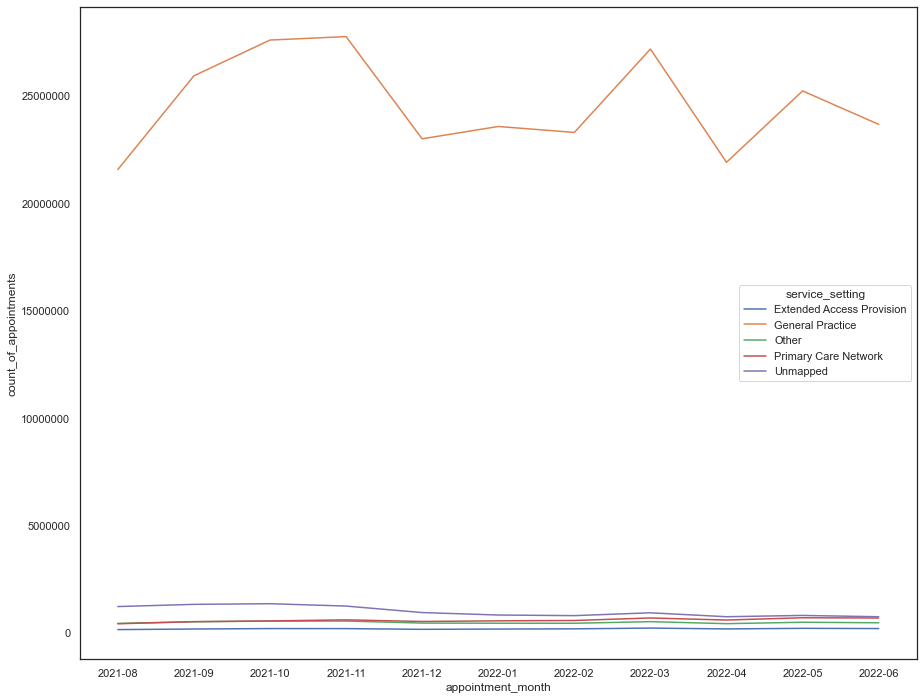

In [75]:
# Plot the appointments over the available date range, and review the service settings for months.
# Create a lineplot.
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='service_setting', data=nc_ss, ci=None, )
plt.ticklabel_format(style='plain', axis='y')
plt.show

**Context types:**

In [76]:
# Aggregate the appointments per month and determine the sum of the appointments per month.
#Create a new DataFrame (e.g. nc_ss).
#Use the groupby() function to group the monthly appointments and service settings for the nc DataFrame.
#Calculate the total number of appointments (sum). (Hint: Remember to reset the index.) 
nc_ct = nc.drop(columns=['appointment_date', 'icb_ons_code', 'sub_icb_location_name'])\
   .loc[:,['context_type','appointment_month','count_of_appointments']]\
   .groupby(['context_type','appointment_month'])\
   .sum()\
   .reset_index ()

# View output.
nc_ct



,context_type,appointment_month,count_of_appointments
0,Care Related Encounter,2021-08,20255235
1,Care Related Encounter,2021-09,24404251
2,Care Related Encounter,2021-10,26125201
3,Care Related Encounter,2021-11,26282778
4,Care Related Encounter,2021-12,21798612
5,Care Related Encounter,2022-01,22441947
6,Care Related Encounter,2022-02,22211021
7,Care Related Encounter,2022-03,25928850
8,Care Related Encounter,2022-04,20904193
9,Care Related Encounter,2022-05,24101243


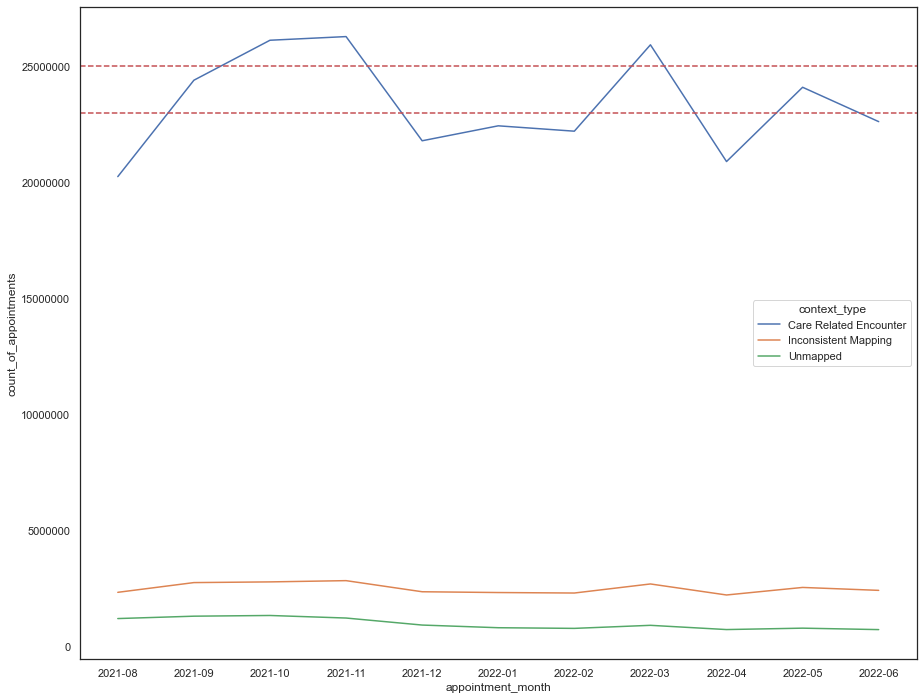

In [102]:
# Plot the appointments over the available date range, and review the context types for months.
# Create a lineplot.
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='context_type', data=nc_ct, ci=None, )
plt.ticklabel_format(style='plain', axis='y')
plt.show
# Add annotation lines.
plt.axhline(y=25000000, color='r', linestyle='--')
plt.axhline(y=23000000, color='r', linestyle='--')


**National categories:**

In [149]:
# Aggregate the appointments per month and determine the sum of the appointments per month.
#Create a new DataFrame (e.g. nc_ss).
#Use the groupby() function to group the monthly appointments and service settings for the nc DataFrame.
#Calculate the total number of appointments (sum). (Hint: Remember to reset the index.) 
nc_nc = nc.drop(columns=['appointment_date', 'icb_ons_code', 'sub_icb_location_name'])\
   .loc[:,['national_category','appointment_month','count_of_appointments']]\
   .groupby(['national_category','appointment_month'])\
   .sum()\
   .reset_index ()

# View output.
nc_nc


,national_category,appointment_month,count_of_appointments
0,Care Home Needs Assessment & Personalised Care...,2021-08,29676
1,Care Home Needs Assessment & Personalised Care...,2021-09,33503
2,Care Home Needs Assessment & Personalised Care...,2021-10,32441
3,Care Home Needs Assessment & Personalised Care...,2021-11,38827
4,Care Home Needs Assessment & Personalised Care...,2021-12,34653
...,...,...,...
193,Walk-in,2022-02,31665
194,Walk-in,2022-03,38070
195,Walk-in,2022-04,32346
196,Walk-in,2022-05,37687


<function matplotlib.pyplot.show(close=None, block=None)>

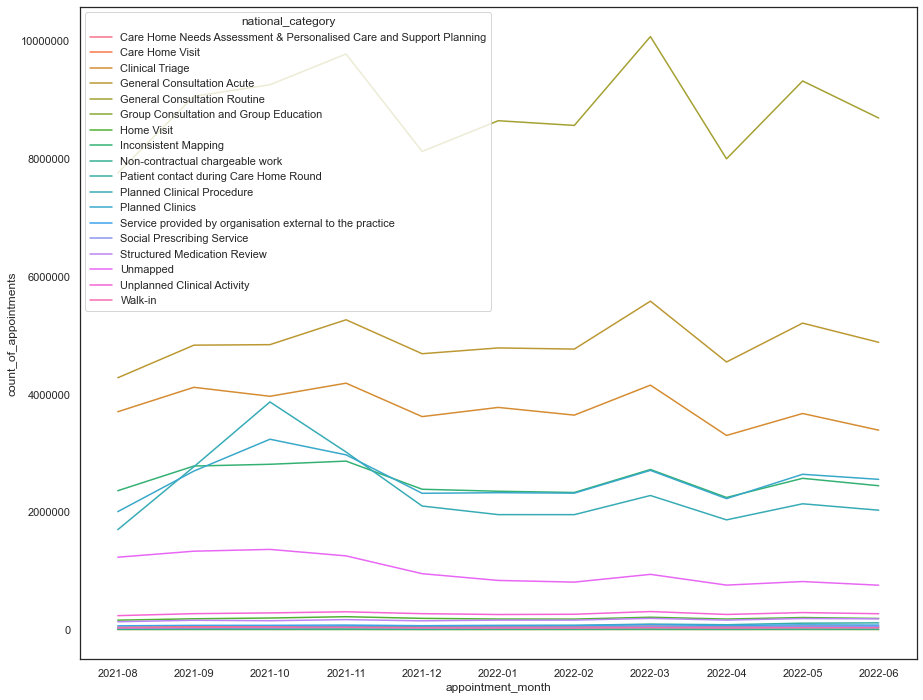

In [150]:
# Plot the appointments over the available date range, and review the national categories for months.
# Create a lineplot.
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='national_category', data=nc_nc, ci=None)
plt.ticklabel_format(style='plain', axis='y')
plt.show


In [171]:
#View that national categories have 18 variables we created a new subset with 6 top categories

nc_nc_2 = nc[['national_category', 'appointment_month', 'count_of_appointments']]\
        .groupby(['national_category','appointment_month'])\
        .sum()
        
nc_nc_3= nc_nc_2.loc[(nc_nc_2['count_of_appointments']>2500000)]

<function matplotlib.pyplot.show(close=None, block=None)>

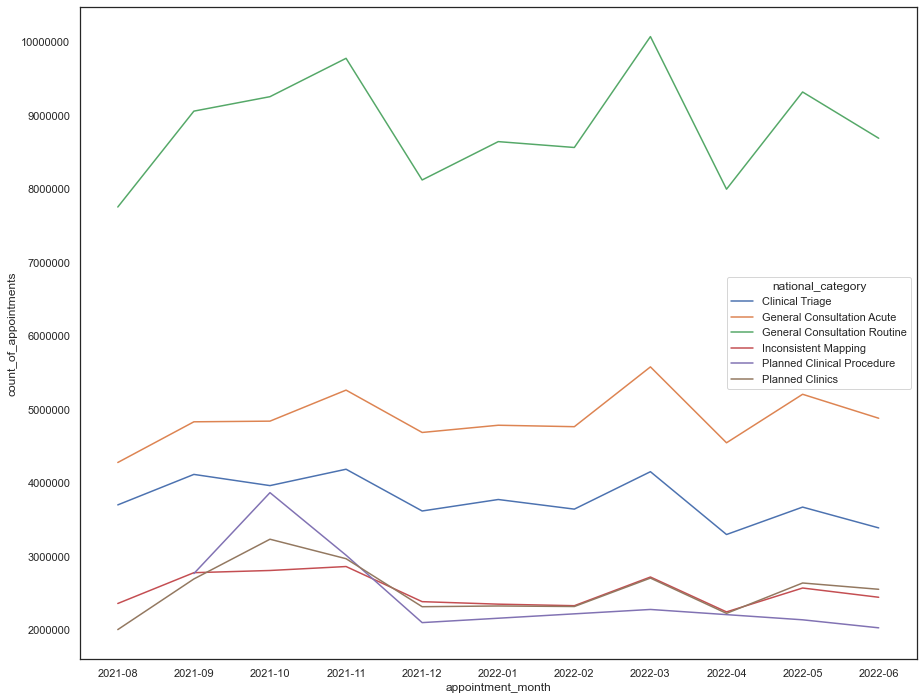

In [169]:
# Plot the appointments over the available date range, and review the national categories for months.
# Create a lineplot.
sns.lineplot(x='appointment_month', y='count_of_appointments', hue='national_category', data=nc_nc_3, ci=None)
plt.ticklabel_format(style='plain', axis='y')
plt.show


### Objective 2
Create four visualisations indicating the number of appointments for service setting per season. The seasons are summer (August 2021), autumn (October 2021), winter (January 2022), and spring (April 2022).

**Summer (August 2021):**

In [ ]:
# Create a separate data set that can be used in future weeks. 


# View output.


In [ ]:
# Look at August 2021 in more detail to allow a closer look.
# Create a lineplot.


**Autumn (October 2021):**

In [ ]:
# Look at October 2021 in more detail to allow a closer look.
# Create a lineplot.


**Winter (January 2022):**

In [ ]:
# Look at January 2022 in more detail to allow a closer look.
# Create a lineplot.


**Spring (April 2022):**

In [ ]:
# Look at April 2022 in more detail to allow a closer look.
# Create a lineplot.


# 

# Assignment activity 5

### Analyse tweets from Twitter with hashtags related to healthcare in the UK.

In [ ]:
# Libraries and settings needed for analysis
import pandas as pd
import seaborn as sns

# Set figure size.
sns.set(rc={'figure.figsize':(15, 12)})

# Set the plot style as white.
sns.set_style('white')

# Maximum column width to display
pd.options.display.max_colwidth = 200

In [ ]:
# Load the data set.


# View the DataFrame.


In [ ]:
# Explore the metadata.


In [ ]:
# Explore the data set.


In [ ]:
# Would it be useful to only look at retweeted and favourite tweet messages?
# Explain your answer.


In [ ]:
# Create a new DataFrame containing only the text.


# View the DataFrame.


In [ ]:
# Loop through the messages, and create a list of values containing the # symbol.


In [ ]:
# Display the first 30 records.


In [ ]:
# Convert the series to a DataFrame in preparation for visualisation.


# Rename the columns.


In [ ]:
# Fix the count datatype.


# View the result.


In [ ]:
# Display records where the count is larger than 10.


In [ ]:
# Create a Seaborn barplot indicating records with a count >10 records.


In [ ]:
# Create the plot.


# View the barplot.


# 

# Assignment activity 6

### Investigate the main cencerns posed by the NHS. 

In [ ]:
# Prepare your workstation.
# Load the appointments_regional.csv file.


# View the DataFrame.


In [ ]:
# Print the min and max dates.


In [ ]:
# Filter the data set to only look at data from 2021-08 onwards.


**Question 1:** Should the NHS start looking at increasing staff levels? 

In [ ]:
# Create an aggregated data set to review the different features.


# View the DataFrame.


In [ ]:
# Determine the total number of appointments per month.


# Add a new column to indicate the average utilisation of services.
# Monthly aggregate / 30 to get to a daily value.


# View the DataFrame.


In [ ]:
# Plot sum of count of monthly visits.
# Convert the appointment_month to string data type for ease of visualisation.


# Create a lineplot with Seaborn.


In [ ]:
# Plot monthly capacity utilisation.


# Create a lineplot.


**Question 2:** How do the healthcare professional types differ over time?

In [ ]:
# Create a line plot to answer the question.


**Question 3:** Are there significant changes in whether or not visits are attended?

In [ ]:
# Create a line plot to answer the question.


**Question 4:** Are there changes in terms of appointment type and the busiest months?

In [ ]:
# Create a line plot to answer the question.


**Question 5:** Are there any trends in time between booking an appointment?

In [ ]:
# Create a line plot to answer the question.


**Question 6:** How do the spread of service settings compare?

In [ ]:
# Let's go back to the national category DataFrame you created in an earlier assignment activity.


In [ ]:
# Create a new DataFrame consisting of the month of appointment and the number of appointments.

# View the DataFrame.


In [ ]:
# Create a boxplot to investigate spread of service settings.


In [ ]:
# Create a boxplot to investigate the service settings without GP.


# 

### Provide a summary of your findings and recommendations based on the analysis.

> Double click to insert your summary.